1a

We know that we get white if and only if we have 2 white alleles

We know that we get red if and only if we have 2 red alleles

We know that we get orange if either allele is red while the other is white.

If two heterozygotes mate, each has a red and a white allele since they are orange, and each contributes one of the alleles at 'random'.

So we have the possible combinations between red (r) and white(w):

p1 gives r and p2 gives r $\Rightarrow$ child is red

p1 gives r and p2 gives w $\Rightarrow$ child is orange

p1 gives w and p2 gives r $\Rightarrow$ child is orange

p1 gives w and p2 gives 2 $\Rightarrow$ child is white

so we have an expected frequency of: 

red = 0.25

white = 0.25

orange = 0.50

1b


$$f_r=\frac{2\cdot N_{red}+N_{orange}}{2 N_{red}+2N_{orange}+2N_{white}}$$

$$f_w=\frac{2\cdot N_{white}+N_{orange}}{2 N_{red}+2N_{orange}+2N_{white}}$$

In [4]:
# 1c

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline


# Define the initial conditions
pop_size = 16
n_alleles = 2 * pop_size
n_gen = 19
freq_r = 0.5
n_simulations = 107
frequency = np.zeros((n_simulations, n_gen+1))


for i in range(n_simulations):
    frequency[i, 0] = 0.5
    for j in range(1, n_gen+1):
        flips = np.random.rand(n_alleles)
        
        num_r = np.sum(flips < frequency[i, j-1])
        
        new_freq = num_r / n_alleles
        
        frequency[i, j] = new_freq


(0, 1)

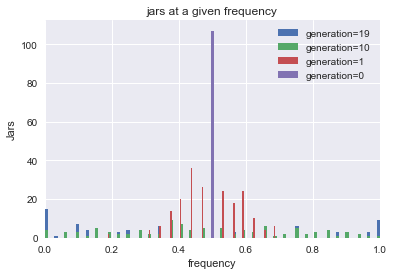

In [5]:
plt.hist(frequency[:, 19], bins=n_simulations, normed=True, label='generation=19')
plt.hist(frequency[:, 10], bins=n_simulations, normed=True, label='generation=10')
plt.hist(frequency[:, 1], bins=n_simulations, normed=True, label='generation=1')
plt.hist(frequency[:, 0], bins=n_simulations, normed=True, label='generation=0')
plt.xlabel('frequency')
plt.ylabel('Jars')
plt.legend()
plt.title('jars at a given frequency')

# Set the xlimits to cover the entire range. 
plt.xlim([0, 1])

In [6]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline

def getAverageFinish(pop):
    # Define the initial conditions
    pop_size = pop
    n_alleles = 2 * pop_size
    n_gen = 1000
    freq_r = 0.5
    n_simulations = 107
    frequency = np.zeros((n_simulations, n_gen+1))
    
    # keep track of 0 points
    zero_pts = []

    for i in range(n_simulations):
        frequency[i, 0] = 0.5
        for j in range(1, n_gen+1):
            flips = np.random.rand(n_alleles)

            num_r = np.sum(flips < frequency[i, j-1])

            new_freq = num_r / n_alleles

            frequency[i, j] = new_freq

            if new_freq == 0 or new_freq == 1:
                zero_pts.append(float(j))
                break # stop checking this sample

    return float(np.average(zero_pts))

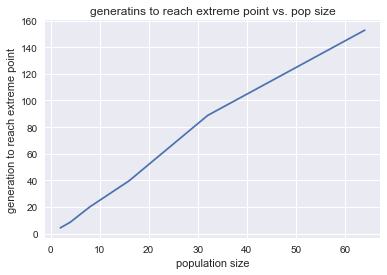

In [7]:
#1d
# define function
x = [2,4,8,16,32,64]
y = []

# get y data corresponding to all x's
for i in x:
    y.append(getAverageFinish(i))


plt.xlabel('population size')
plt.ylabel('generation to reach extreme point')
plt.title('generatins to reach extreme point vs. pop size')

# plot graph
plt.plot(x,y)

plt.show()

If there are more alleles it takes more generations for the the population to reach homogeneity. Smaller populations tend to drift toward an extrema at a faster rate meaning that genetic drift takes place more rapidly for smaller populations as a proportion of the population size.

In [8]:
#1ef

# Define the initial conditions
pop_size = 16
n_alleles = 2 * pop_size
n_gen = 500
freq_r = 0.5
n_simulations = 100
frequency = np.zeros((n_simulations, n_gen+1))
u = 0.001


for i in range(n_simulations):
    frequency[i, 0] = 0.5
    for j in range(1, n_gen+1):
        flips = np.random.rand(n_alleles)
        
        num_r = np.sum(flips < frequency[i, j-1]) 
        
        # flip for possible mutations
        r_to_w_flips = np.random.rand(num_r)
        w_to_r_flips = np.random.rand(n_alleles-num_r)
        
        # adjust for mutations
        num_r -= np.sum(r_to_w_flips <= u)
        num_r += np.sum(w_to_r_flips <= u)
        
        new_freq = num_r / n_alleles
        
        frequency[i, j] = new_freq

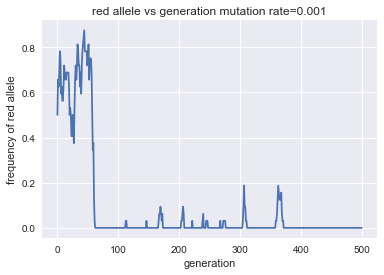

In [9]:
plt.xlabel('generation')
plt.ylabel('frequency of red allele')
plt.title("red allele vs generation mutation rate=0.001")
x = range(0,n_gen)


# get y data corresponding to all x's
y = []
for j in x:
    y.append(frequency[0,j])
plt.plot(x,y)
    
# plot graph
plt.show()

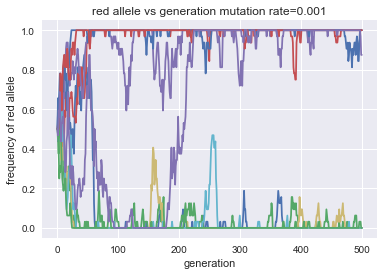

In [10]:
plt.xlabel('generation')
plt.ylabel('frequency of red allele')
plt.title("red allele vs generation mutation rate=0.001")
x = range(0,n_gen)

# get y data corresponding to all x's
for i in range(10):
    y = []
    for j in x:
        y.append(frequency[i,j])
    plt.plot(x,y, label="sample" + str(i+1))
    
# plot graph
plt.show()

(0, 1)

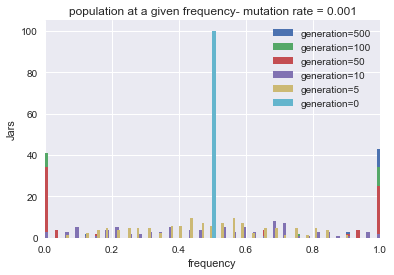

In [11]:
# plot histagrams
plt.hist(frequency[:, 500], bins=n_simulations, normed=True, label='generation=500')
plt.hist(frequency[:, 100], bins=n_simulations, normed=True, label='generation=100')
plt.hist(frequency[:, 50], bins=n_simulations, normed=True, label='generation=50')
plt.hist(frequency[:, 10], bins=n_simulations, normed=True, label='generation=10')
plt.hist(frequency[:, 5], bins=n_simulations, normed=True, label='generation=5')
plt.hist(frequency[:, 0], bins=n_simulations, normed=True, label='generation=0')
plt.xlabel('frequency')
plt.ylabel('Jars')
plt.legend()
plt.title('population at a given frequency- mutation rate = 0.001')

# Set the xlimits to cover the entire range. 
plt.xlim([0, 1])

e)

In examination of a single population with a mutation we see a key difference being that a population sometimes rebounds from a frequency of either 0 or 1. Thus we don't have a constant end behavior as a population is prone to change even if the population is homogenous at some generation. Without mutation, a population with 100% of an allele frequency would remain like that forever




f)

A key difference between this case and the case with a 0 mutation rate is that when there is 0 mutation rate a population that comes to be 100% red or white has no mechanism by which to dehomogonize so there will be more populations that end at either extreme (0 or 1), whereas the populations with mutations will not have as many perfectly homogenous populations. The histogram shows lower values for the extremes points even after many generation which is reflective of the above concept.

In [12]:
def getEnd(error_rate):
    # initial conditions
    pop_size = 16
    n_alleles = 2 * pop_size
    n_gen = 100
    freq_r = 0.5
    n_simulations = 100
    frequency = np.zeros((n_simulations, n_gen+1))
    u = error_rate


    for i in range(n_simulations):
        frequency[i, 0] = 0.5
        for j in range(1, n_gen+1):
            flips = np.random.rand(n_alleles)

            num_r = np.sum(flips < frequency[i, j-1])

            # flip for possible mutations
            r_to_w_flips = np.random.rand(num_r)
            w_to_r_flips = np.random.rand(n_alleles-num_r)
            # adjust for mutations
            num_r -= np.sum(r_to_w_flips <= u)
            num_r += np.sum(w_to_r_flips <= u)

            new_freq = num_r / n_alleles

            frequency[i, j] = new_freq
    plt.hist(frequency[:, 100], bins = 100,normed=True, label='u='+str(error_rate))
    

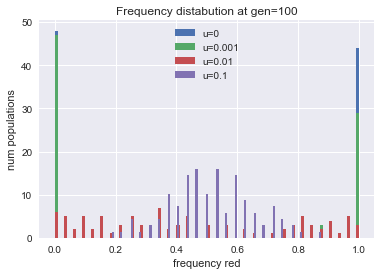

In [13]:
getEnd(0)
getEnd(.001)
getEnd(0.01)
getEnd(0.1)

plt.xlabel('frequency red')
plt.ylabel('num populations')
plt.title('Frequency distabution at gen=100')
plt.legend()

Similarly to part f, we see that a higher mutation rate means a less homogenous set of alleles amongst a population after a given times point. For example, with 0 mutation rate, virtually all of the populations have either 0% or 100% red alleles by t=500 whereas 0.1 mutation rate has far more mixed populations after t=500. Lower mutation rates steadily spread toward the extremes while high mutation rates tend for a mixed allele group.

2a)


$$N_{tot}(t)=N_1(0)e^{m_1t}+N_2(0)e^{m_2t}$$

2b)


$$p(t)=\frac{N_1(t)}{N_{tot}(t)}=\frac{1}{1+\frac{N_2(0)}{N_1(0)}e^{-m_1st}}$$

$$q(t)=\frac{N_2(t)}{N_{tot}(t)}=\frac{1}{1+\frac{N_1(0)}{N_2(0)}e^{m_1st}}$$

2c)


$$N_1(t)=N_1(0)e^{m_1t}\Rightarrow 2=e^{\frac{1}{8760}m_1}\Rightarrow m_1=6071.97$$

$$10^{-9}=N_1(0)=\frac{1}{1+\frac{N_2(0)}{N_1(0)}}\Rightarrow \frac{N_2(0)}{N_1(0)}=999999999$$

/Users/eli/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in power


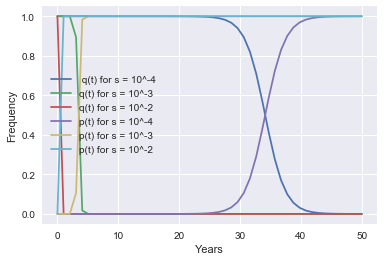

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,50)
y = 1/(1+999999999 * np.e ** (-6071.97 * 10**-4 * x))
z = 1/(1+999999999 * np.e ** (-6071.97 * 10**-3 * x))
a = 1/(1+999999999 * np.e ** (-6071.97 * 10**-2 * x))

q = 1/(1+1/999999999 * np.e ** (6071.97 * 10**-4 * x))
r = 1/(1+1/999999999 * np.e ** (6071.97 * 10**-3 * x))
s = 1/(1+1/999999999 * np.e ** (6071.97 * 10**-2 * x))

plt.xlabel('Years')
plt.ylabel('Frequency')

plt.plot(x,q,label=' q(t) for s = 10^-4')
plt.plot(x,r,label='q(t) for s = 10^-3')
plt.plot(x,s,label='q(t) for s = 10^-2')
plt.plot(x,y,label='p(t) for s = 10^-4')
plt.plot(x,z,label='p(t) for s = 10^-3')
plt.plot(x,a,label='p(t) for s = 10^-2')

plt.legend()


/Users/eli/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in power


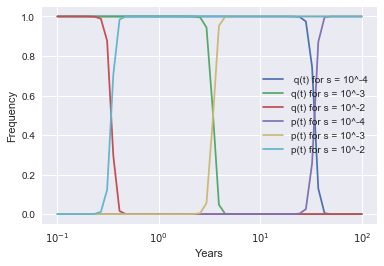

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.logspace(-1,2)
y = 1/(1+999999999 * np.e ** (-6071.97 * 10**-4 * x))
z = 1/(1+999999999 * np.e ** (-6071.97 * 10**-3 * x))
a = 1/(1+999999999 * np.e ** (-6071.97 * 10**-2 * x))

q = 1/(1+1/999999999 * np.e ** (6071.97 * 10**-4 * x))
r = 1/(1+1/999999999 * np.e ** (6071.97 * 10**-3 * x))
s = 1/(1+1/999999999 * np.e ** (6071.97 * 10**-2 * x))

plt.xlabel('Years')
plt.ylabel('Frequency')

plt.plot(x,q,label=' q(t) for s = 10^-4')
plt.plot(x,r,label='q(t) for s = 10^-3')
plt.plot(x,s,label='q(t) for s = 10^-2')
plt.plot(x,y,label='p(t) for s = 10^-4')
plt.plot(x,z,label='p(t) for s = 10^-3')
plt.plot(x,a,label='p(t) for s = 10^-2')
plt.xscale('log')
plt.legend()



2e)


We can explain this behavior by considering (as suggested) that the number of sites in a genome where a mutation might be beneficial is finite. With that see we can see why there would be a faster increase in fitness early on when all such sites haven't been mutated yet and they are more frequent beneficial mutations. As the mutations occur, further mutation on certain sites may be unfavorable or neutral so we have that the increase in fitness begins to steady out as there are fewer such sites at any given time, thus a slower rate of beneficial mutation and increase in fitness.

2f)


Without considering the reading error rate we can set a reasonable lower bound of detectable frequency at 1/50=2% as we have 50 copies of a given allele so we would not be able to get results between 0 and 2%. If we consider the 1% error rate of allele detection we have errors in 0.5 of every 50 readings. So for a lower bound we assume that all such errors occur in detection of the minority allele, thus we have an additional 1% uncertainty and should raise the lower bound to 3% overall